In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 47.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 53.1 MB/s eta 0:00:0000:01
  Attempting uninstall: fsspec━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  4/19 [pyarrow]
    Found existing installation: fsspec 2025.3.2━━━━━━━━━━━━━━  4/19 [pyarrow]
    Uninstalling fsspec-2025.3.2:━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  4/19 [pyarrow]
      Successfully uninstalled fsspec-2025.3.2━━━━━━━━━━━━━━━━  4/19 [pyarrow]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19/19 [datasets]/19 [datasets]ce-hub]


In [5]:
from datasets import Dataset, DatasetDict, Features, Value, Image
import os
import pandas as pd

# Paths to your folders
ground_truth_dir = "/Users/prajakta/Downloads/psf5_gt_cropped"
psf_convolved_dir =  "/Users/prajakta/Downloads/psf5_dat_cropped"

In [6]:
# Step 1: Match files based on common prefix
gt_files = sorted([f for f in os.listdir(ground_truth_dir) if f.endswith("_gt.png")])
psf_files = sorted([f for f in os.listdir(psf_convolved_dir) if f.endswith("_convolved.png")])

# Extract common base names (e.g., '100_B11_1_blue_maxcrop')
gt_basenames = {f.replace("_gt.png", "") for f in gt_files}
psf_basenames = {f.replace("_convolved.png", "") for f in psf_files}

common_basenames = sorted(gt_basenames & psf_basenames)

# Step 2: Create file pairs
file_pairs = [{
    "image": os.path.join(psf_convolved_dir, f"{basename}_convolved.png"),
    "label": os.path.join(ground_truth_dir, f"{basename}_gt.png")
} for basename in common_basenames]

print(f"✅ Matched {len(file_pairs)} image pairs.")

# Step 3: Convert to HF Dataset
df = pd.DataFrame(file_pairs)

features = Features({
    "image": Image(),
    "label": Image()
})

dataset = Dataset.from_pandas(df, features=features)

# Step 4: Save locally (optional before uploading)
output_path = "/Users/prajakta/Downloads/human_protein_atlas_cells_dataset"
dataset.save_to_disk(output_path)

print(f"📁 Dataset saved to {output_path}")

✅ Matched 1000 image pairs.


Saving the dataset (1/1 shards): 100%|██████████| 1000/1000 [00:00<00:00, 1497.30 examples/s]

📁 Dataset saved to /Users/prajakta/Downloads/human_protein_atlas_cells_dataset


In [12]:
from datasets import load_from_disk

dataset = load_from_disk("/Users/prajakta/Downloads/human_protein_atlas_cells_dataset")

print(dataset[0].keys())  # ✅ ['image', 'label']
dataset[0]['image'].show()
dataset[0]['label'].show()

dict_keys(['image', 'label'])


In [15]:
from datasets import load_from_disk
from huggingface_hub import login

# Use this in terminal or script (not in Jupyter)
login(token="TEST_SECRET")

# Load your dataset from local disk
dataset = load_from_disk("/Users/prajakta/Downloads/human_protein_atlas_cells_dataset")

# Push to Hugging Face Hub
dataset.push_to_hub("prajaktakini/human_protein_atlas_cells_dataset")

Map: 100%|██████████| 1000/1000 [00:00<00:00, 6618.62 examples/s][A

Uploading the dataset shards: 100%|██████████| 1/1 [00:49<00:00, 49.65s/it]


CommitInfo(commit_url='https://huggingface.co/datasets/prajaktakini/human_protein_atlas_cells_dataset/commit/34c33a895efd6d1a589529a718316a1b91301ae5', commit_message='Upload dataset', commit_description='', oid='34c33a895efd6d1a589529a718316a1b91301ae5', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/prajaktakini/human_protein_atlas_cells_dataset', endpoint='https://huggingface.co', repo_type='dataset', repo_id='prajaktakini/human_protein_atlas_cells_dataset'), pr_revision=None, pr_num=None)

Generating train split: 100%|██████████| 1000/1000 [00:00<00:00, 1023.95 examples/s]


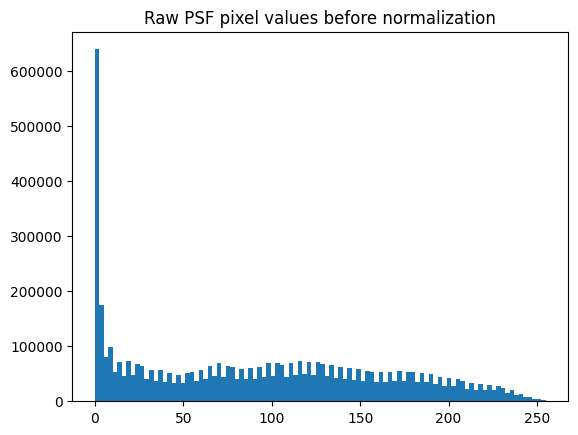

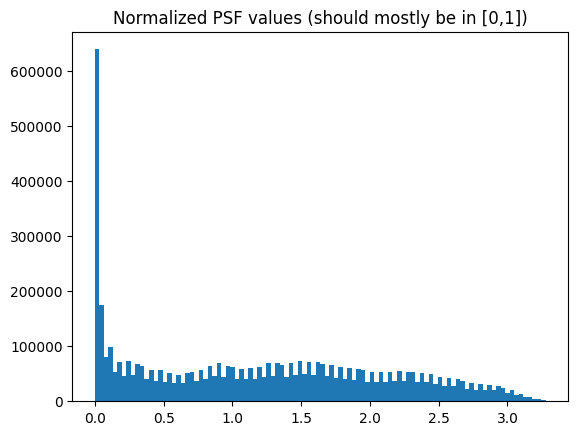

In [19]:
import numpy as np
from scipy.io import savemat
from PIL import Image  # Add this import
resize_shape = (128, 128)  # Desired image size


from datasets import load_dataset

# Load dataset from Hugging Face
hf_dataset = load_dataset("prajaktakini/human_protein_atlas_cells_dataset", split="train")

import matplotlib.pyplot as plt

sample_vals = [np.array(sample["image"].convert("L"), dtype=np.float32) for sample in hf_dataset.select(range(20))]

# Plot histogram before normalization
flat_vals = np.concatenate([vals.flatten() for vals in sample_vals])
plt.hist(flat_vals, bins=100)
plt.title("Raw PSF pixel values before normalization")
plt.show()

measNormalization = 77.77  # <-- your current value

normed_vals = [img / measNormalization for img in sample_vals]
flat_normed = np.concatenate([vals.flatten() for vals in normed_vals])
plt.hist(flat_normed, bins=100)
plt.title("Normalized PSF values (should mostly be in [0,1])")
plt.show()

In [20]:
print(f"Max raw value: {np.max(flat_vals)}")
print(f"Mean raw value: {np.mean(flat_vals)}")
print(f"Max after normalization: {np.max(flat_normed)}")
print(f"Mean after normalization: {np.mean(flat_normed)}")

Max raw value: 255.0
Mean raw value: 93.13223266601562
Max after normalization: 3.2788994312286377
Mean after normalization: 1.1975347995758057


In [21]:

import numpy as np
from scipy.io import savemat
from PIL import Image  # Add this import
resize_shape = (128, 128)  # Desired image size


from datasets import load_dataset

# Load dataset from Hugging Face
hf_dataset = load_dataset("prajaktakini/human_protein_atlas_cells_dataset", split="train")


print(hf_dataset.shape)
print(hf_dataset[0])



# Inspect PSF value range to validate normalization

sample_vals = [np.array(sample["image"].convert("L"), dtype=np.float32) for sample in hf_dataset.select(range(1000))]
psf_max = np.max([np.max(im) for im in sample_vals])
psf_mean = np.mean([np.mean(im) for im in sample_vals])
print(f"🔍 PSF Sample Max: {psf_max:.2f}, Mean: {psf_mean:.2f}")
if psf_max < 10:
    print("✅ measNormalization ~5 is likely appropriate.")
else:
    print("⚠️ Consider adjusting measNormalization. Peak PSF intensity is high.")

# Set normalization
#measNormalization = 77.77

measNormalization = 255.0

# Accumulate images
diff_L = []     # PSF (input)
truthIms = []   # Ground truth

for sample in hf_dataset:
    psf_img = sample["image"].convert("L").resize(resize_shape, Image.BICUBIC)
    gt_img = sample["label"].convert("L").resize(resize_shape, Image.BICUBIC)

    psf_np = np.array(psf_img, dtype=np.float32) / measNormalization
    gt_np = np.array(gt_img, dtype=np.float32)

    diff_L.append(psf_np)
    truthIms.append(gt_np)

# Stack to [H, W, N]
diff_L = np.stack(diff_L, axis=2)
truthIms = np.stack(truthIms, axis=2)

# Save to .mat
output_matfile = "hf_microscopy_dataset_with_maxnormalize.mat"
savemat(output_matfile, {
    "diff_L": diff_L,
    "truthIms": truthIms
})

print(f"✅ Saved {output_matfile} with shape diff_L: {diff_L.shape}, truthIms: {truthIms.shape}")

(1000, 2)
{'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=512x512 at 0x12B5CCC40>, 'label': <PIL.PngImagePlugin.PngImageFile image mode=L size=512x512 at 0x12B5CD210>}
🔍 PSF Sample Max: 255.00, Mean: 77.77
⚠️ Consider adjusting measNormalization. Peak PSF intensity is high.
✅ Saved hf_microscopy_dataset.mat with shape diff_L: (128, 128, 1000), truthIms: (128, 128, 1000)


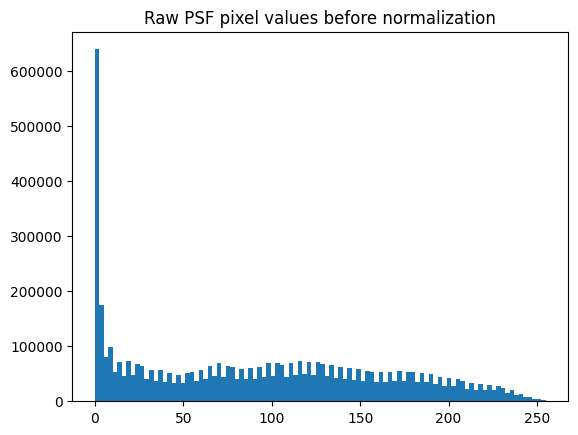

In [18]:
import matplotlib.pyplot as plt

sample_vals = [np.array(sample["image"].convert("L"), dtype=np.float32) for sample in hf_dataset.select(range(20))]

# Plot histogram before normalization
flat_vals = np.concatenate([vals.flatten() for vals in sample_vals])
plt.hist(flat_vals, bins=100)
plt.title("Raw PSF pixel values before normalization")
plt.show()